# Problem statement

+To forecast level of CO2 emission for the upcoming years by an Industry

# Importing the libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Loading the dataset

In [76]:
carbondioxide_level=pd.read_excel(r'C:\Users\lenovo\Downloads\CO2 dataset.xlsx',header=0, index_col=0, parse_dates=True)

In [77]:
#First five records of the dataset
carbondioxide_level.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [78]:
#Last five records of the dataset
carbondioxide_level.tail()

,CO2
Year,
2010-01-01,15.6
2011-01-01,15.6
2012-01-01,14.8
2013-01-01,14.7
2014-01-01,15.1


# Data Insights

In [79]:
#number of rows and columns
carbondioxide_level.shape

(215, 1)

From Above Results There are 215 Rows And 2 Columns

In [80]:
#Type Of Dataset
carbondioxide_level.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 1800-01-01 to 2014-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


From Above There is No-Null Count, And the Year data type is int64 And co2 data type is float64

In [81]:
carbondioxide_level.index

DatetimeIndex(['1800-01-01', '1801-01-01', '1802-01-01', '1803-01-01',
               '1804-01-01', '1805-01-01', '1806-01-01', '1807-01-01',
               '1808-01-01', '1809-01-01',
               ...
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01'],
              dtype='datetime64[ns]', name='Year', length=215, freq=None)

<AxesSubplot:ylabel='Year'>

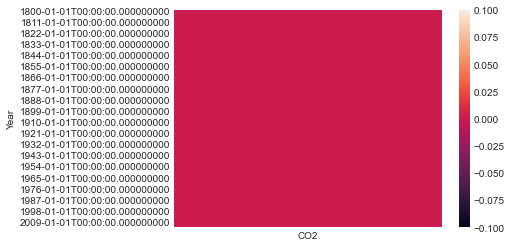

In [82]:
sns.heatmap(carbondioxide_level.isnull())

From Aove There is NO-Null Values in this dataset
CO2 emissions for the year 1800 to 2014

In [83]:
#Check the duplicate values
carbondioxide_level[carbondioxide_level.duplicated()]

,CO2
Year,
1875-01-01,0.461
1886-01-01,1.870
1894-01-01,2.780
1896-01-01,2.810
1898-01-01,2.940
1923-01-01,10.100
1928-01-01,9.320
1937-01-01,8.270
1940-01-01,9.330


from Above There is No Duplicate values or columns

In [84]:
carbondioxide_level.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


# VISUALIZATION AND DECOMPOSITION OF DATA

<AxesSubplot:xlabel='Year'>

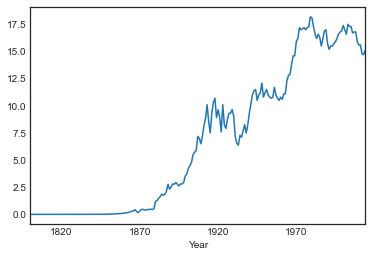

In [85]:
#check the type of dataset
carbondioxide_level.CO2.plot()

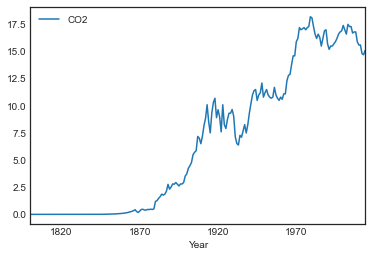

In [86]:
# line plot for co2
from pandas import read_csv
from matplotlib import pyplot
carbondioxide_level.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

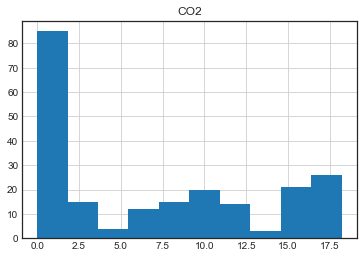

In [87]:
#Histogram For Year And co2
carbondioxide_level.hist()

<AxesSubplot:xlabel='CO2'>

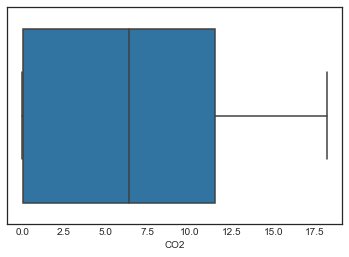

In [88]:
#Check the Outlier value for the Dataset
sns.boxplot(carbondioxide_level['CO2'])

From Above Boxplot there is no outlier detected in this dataset
the range of CO2 emission lies between 0 to around 18

# Data Driven models

# Moving average

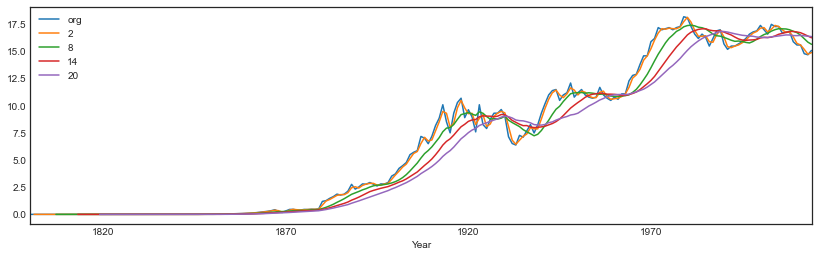

In [89]:
plt.figure(figsize=(14,4))
carbondioxide_level.CO2.plot(label="org")
for i in range(2,24,6):
    carbondioxide_level["CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

The emissions mean and the variation in standard deviation vary with time. This shows that the series has a trend. So, it is not a stationary.

# Time Series Decomposition plots

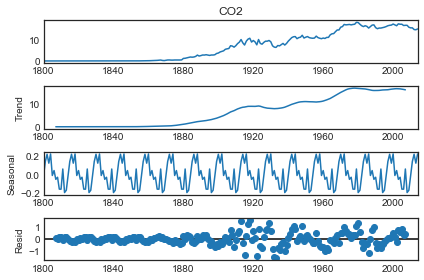

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(carbondioxide_level.CO2,freq=14,model="additive")
decompose_ts_add.plot()
plt.show()

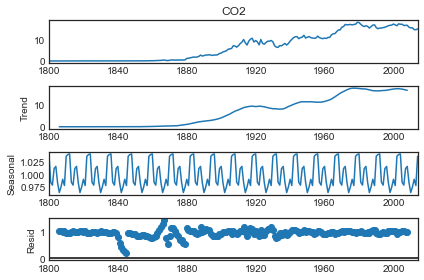

In [91]:
decompose_ts_add = seasonal_decompose(carbondioxide_level.CO2,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

# GRAPHICALLY TESTED STATIONARY

In [92]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [93]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

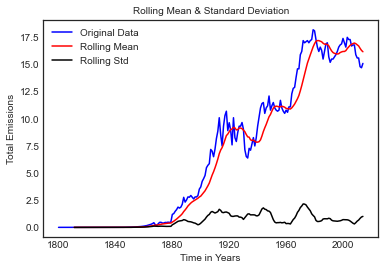

In [94]:
TestStationaryPlot(carbondioxide_level)

# TEST STATIONARY USING DICKEY-FULLER

In [95]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts['CO2'].values, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [96]:
TestStationaryAdfuller(carbondioxide_level)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# TO TRANSFORM THE DATASET INTO STATIONARY

# The most common method of dealing with both trend and seasonality is differencing.
#Eliminating trend and seasonality: Differencing

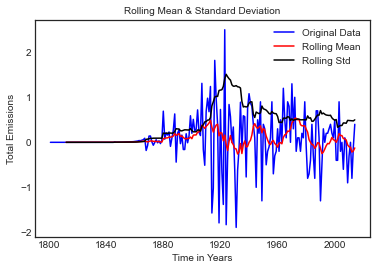

In [97]:
CO2_first_difference = carbondioxide_level - carbondioxide_level.shift(1)  
TestStationaryPlot(CO2_first_difference.dropna(inplace=False))

In [98]:
TestStationaryAdfuller(CO2_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The first difference improves the stationarity of the series significantly.We also used the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the data.¶

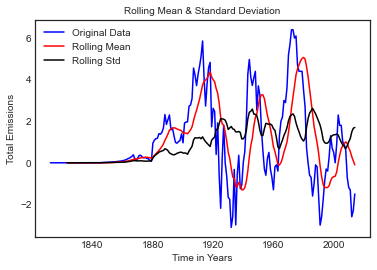

In [99]:
CO2_seasonal_difference = carbondioxide_level - carbondioxide_level.shift(12)  
TestStationaryPlot(CO2_seasonal_difference.dropna(inplace=False))

In [100]:
TestStationaryAdfuller(CO2_seasonal_difference.dropna(inplace=False))

Test Statistic                  -1.847905
p-value                          0.356951
#Lags Used                      15.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


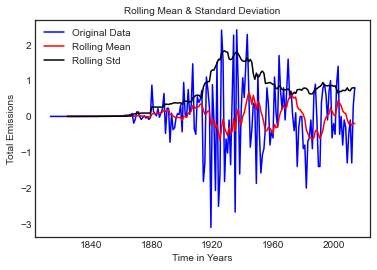

In [101]:
CO2_seasonal_first_difference = CO2_first_difference - CO2_first_difference.shift(12)  
TestStationaryPlot(CO2_seasonal_first_difference.dropna(inplace=False))

In [102]:
TestStationaryAdfuller(CO2_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -6.831718e+00
p-value                        1.886305e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.870000e+02
Critical Value (1%)           -3.465812e+00
Critical Value (5%)           -2.877123e+00
Critical Value (10%)          -2.575077e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


# FIND OPTIMAL PARAMETERS AND BUILD ARIMA MODEL.

1.Number of Auto-Regressive (AR) terms (p)
2.Number of Moving Average(MA) terms (q)
3.Number of Differences (d)

# Plot the ACF and PACF charts and find the optimal parameters

# 1.Autocorrelation Function (ACF)

It is a measure of the correlation between the the time series (ts) with a lagged version of itself.


# ACF and PACF plots

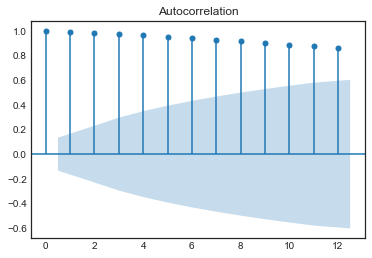

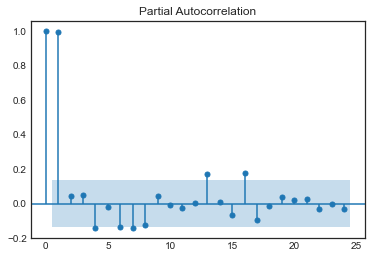

In [103]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(carbondioxide_level.CO2,lags=12)
tsa_plots.plot_pacf(carbondioxide_level.CO2)
plt.show()

In [104]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
warnings.filterwarnings("ignore") 

# GRID SEARCH

To find the optimal parameters for ARIMA models using the graphical method is not trivial and it is time consuming. We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. The grid search iteratively explore different combinations of the parameters.

In [105]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score

# AIC (Akaike Information Criterion) value

AIC will choose the best model from a set(The “best” model will be the one that neither under-fits nor over-fits.),then consider running a hypothesis test to figure out the relationship between the variables in your model and the outcome of interest.

In [106]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(carbondioxide_level,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [107]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [108]:
mod = sm.tsa.statespace.SARIMAX(carbondioxide_level.CO2, trend='n', order=(0,1,0), seasonal_order=(0,0,1,12))
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  CO2   No. Observations:                  215
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -176.216
Date:                              Fri, 23 Jul 2021   AIC                            356.432
Time:                                      18:34:45   BIC                            363.164
Sample:                                  01-01-1800   HQIC                           359.152
                                       - 01-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0465      0.050     -0.925      0.355      -0.145       0.052
sigma2         0.30

# The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

# Get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

<AxesSubplot:xlabel='Year'>

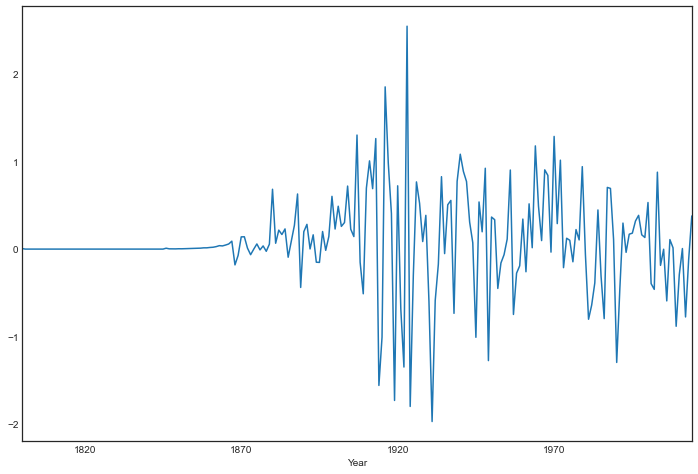

In [109]:
results.resid.plot(figsize=(12,8))

In [110]:
print(results.resid.describe())

count    215.000000
mean       0.073984
std        0.546243
min       -1.970341
25%       -0.005524
50%        0.004696
75%        0.244870
max        2.546826
dtype: float64


# The figure displays the distribution of the residual errors. It shows a little bias in the prediction.

# we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

<AxesSubplot:ylabel='Density'>

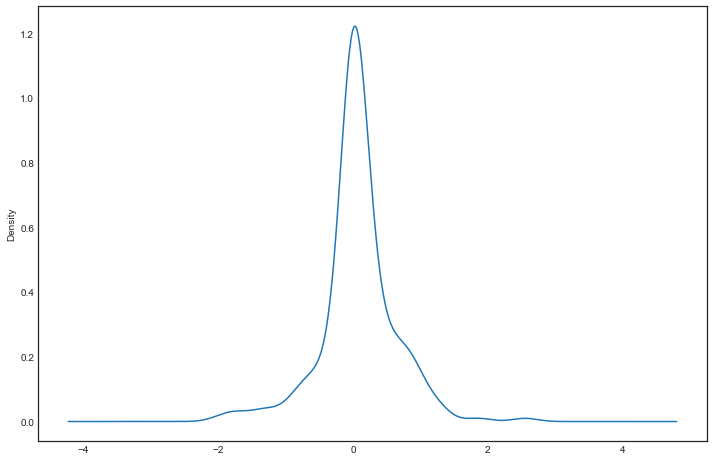

In [111]:
results.resid.plot(figsize=(12,8),kind='kde')

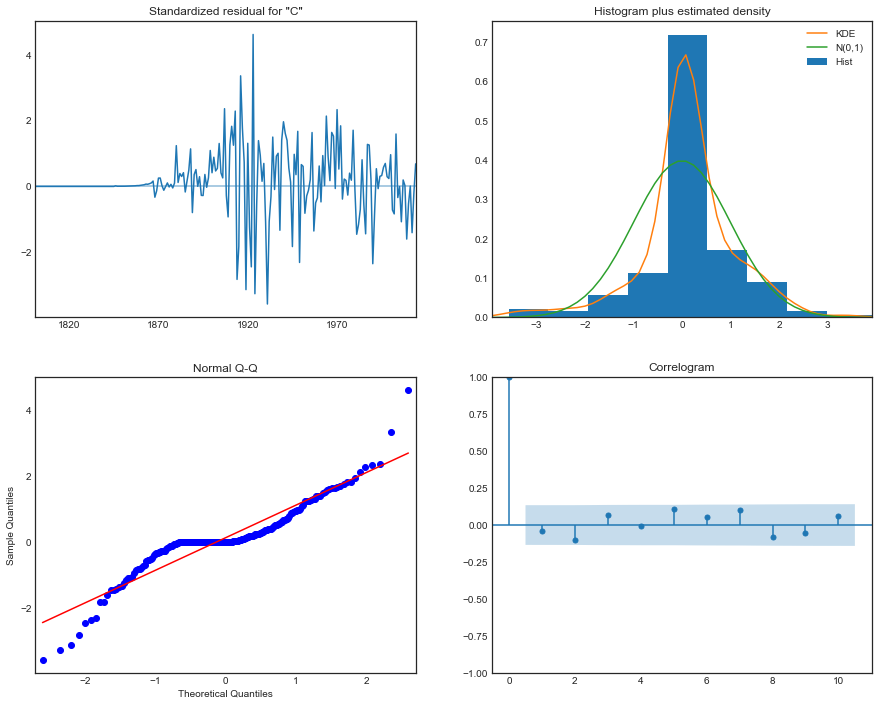

In [112]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### The model diagnostic suggests that the model residual is normally distributed based on the following:

In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed. The forecast errors deviate somewhat from the straight line, indicating that the normal distribution is not a perfect model for the distribution of forecast errors, but it is not unreasonable.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.



# conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

# VALIDATING PREDICTION

# We will compare predicted values to real values of the time series, which will help us understand the accuracy of our forecast.

# FORECASTING : 

The forecasting methods I will cover are:
   * Seasonal Naive 
   * Triple Exponential Smoothing (Holt Winter's)
   * SARIMA
   * Linear Model
   * Exponential Smoothing
   * Quadratic Model

In [113]:
!pip install pmdarima

In [114]:
!pip install altair vega_datasets
import altair as alt 

In [115]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt 
plt.style.use('seaborn-white')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations





import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)


In [116]:
# Printing library versions

print('Pandas:', pd.__version__)
print('Statsmodels:', sm.__version__)
print('Scipy:', scipy.__version__)
print('Numpy:', np.__version__)

Pandas: 1.1.3
Statsmodels: 0.12.0
Scipy: 1.5.2
Numpy: 1.19.2


### Various Functions Used :

Below are some of the custom functions I wrote for forecast accuracy, gridsearching, residual diagnostics.

In [117]:
def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def HWGrid(train, test, seasonal_periods):
    """
    Functions returns a dataframe with parameters of the Holt-Winter's method and corresponding train & test evaluation scores. 
    It also does a quick check of the residuals using Ljung-Box test and Shapiro test for normality. 
    Residuals must be uncorrelated. 
    
    train: (pandas series)
        -  Training data
        
    test: (pandas series)
        -  Test data
    
    Seasonal_periods: int
        - No of seasonas in the time period. e.g. 4 for Quarterly, 12 for Monthly, 52 for Weekly data
        
    """


    trend      = ['add','mul']
    seasonal   = ['add','mul']
    damped     = [False, True]
    use_boxcox = [False, True, 'log']

    params = itertools.product(trend,seasonal,damped,use_boxcox)

    result_df = pd.DataFrame(columns=['Trend', 'Seasonal', 'Damped', 'BoxCox','AICc Train',  
                                      '%MAPE_Train', 'RMSE_Train', '%MAPE_Test', 
                                      'RMSE_Test', "Resid_LJ", "Resid_Norm","Resid_mean" ])
    
    
    for trend,seasonal,damped,use_boxcox in params:
    
            model = ExponentialSmoothing(train, 
                                     trend=trend,
                                     damped=damped,
                                     seasonal=seasonal,
                                     seasonal_periods=seasonal_periods).fit(use_boxcox=use_boxcox)
    
    
            
            mape1=MAPE(train,model.fittedvalues) 
            rmse1=rmse(train,model.fittedvalues)

            mape2=MAPE(test,model.forecast(len(test))) 
            rmse2=rmse(test,model.forecast(len(test)))

            aicc1 = model.aicc.round(1)

               
    
            lj_p_val = np.mean(ljung(x=model.resid, lags=10)[1])
            norm_p_val =  jb(model.resid)[1]#shapiro(model.resid)[1]
    
            lj = "Uncorrelated" if lj_p_val > 0.05 else "Correlated"
            norm = "Normal" if norm_p_val > 0.05 else "Non-Normal"
            
    
            result_df = result_df.append({'Trend':trend       ,
                              'Seasonal': seasonal            ,
                              'Damped':damped                 ,
                              'BoxCox':use_boxcox             ,
                              '%MAPE_Train':np.round(mape1,2) ,
                              'RMSE_Train':np.round(rmse1,1)  ,
                              'AICc Train':aicc1              ,
                              '%MAPE_Test':np.round(mape2,2)  ,
                              'RMSE_Test':np.round(rmse2,1)   ,
                              'Resid_LJ' :lj                  ,
                              'Resid_Norm':norm               ,
                              'Resid_mean':np.round(model.resid.mean(),1)} , ignore_index=True, sort=False)
    
    
    return result_df.sort_values(by=["RMSE_Test", "%MAPE_Test","RMSE_Train","%MAPE_Train"]).style.format({"%MAPE_Train":"{:20,.2f}%", "%MAPE_Test": "{:20,.2f}%"}).highlight_min(color='lightgreen')
    


Calculating cross-validation score for Holt-Winter's method in Python 

In [118]:
def hw_cv(series, seasonal_periods, initial_train_window, test_window):
    
    from statsmodels.tools.eval_measures import rmse
    import warnings
    warnings.filterwarnings("ignore")
    
    """
     
     Returns Rolling and Expanding cross-validation scores (avg rmse), along with model paramters
     for Triple Exponential Smoothing method. Expanding expands the training set each time by adding one observation, 
     while rolling slides the training and test by one observation each time. 
     
     Output shows parameters used and Rolling & Expanding cv scores. Output is in below order:
          1. Trend 2. Seasonal 3. Damped 4. use_boxcox 5. Rolling cv 6. Expanding cv 
     
     Requirements: Pandas, Numpy, Statsmodels, itertools, rmse 
     
     series: Pandas Series
             Time series 
     
     seasonal_periods: int
             No of seasonal periods in a full cycle (e.g. 4 in quarter, 12 in monthly, 52 in weekly data)
             
     initial_train_window: int
             Minimum training set length. Recommended to use minimum 2 * seasonal_periods
     
     test_window: int
             Test set length. Recommended to use equal to forecast horizon
             
     e.g. hw_cv(ts["Sales"], 4, 12, 6 )
          Output: add add False False    R: 41.3   ,E: 39.9

          
     Note: This function can take anywhere from 5-15 min to run full output        
    
     
    
    
    """
    
    
    def expanding_tscv(series,trend,seasonal,seasonal_periods,damped,boxcox,initial_train_window, test_window):
        i =  0
        x = initial_train_window
        t = test_window
        errors_roll=[]

        while (i+x+t) <len(series):
            train_ts=series[:(i+x)].values
            test_ts= series[(i+x):(i+x+t)].values
            model_roll = ExponentialSmoothing(train_ts,
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=seasonal_periods,
                                         damped=damped).fit(use_boxcox=boxcox)

            fcast = model_roll.forecast(t)

            error_roll = rmse(test_ts, fcast)

            errors_roll.append(error_roll)

            i=i+1


        return np.mean(errors_roll).round(1)

    def rolling_tscv(series,trend,seasonal,seasonal_periods,damped,boxcox,initial_train_window, test_window):
        i =  0
        x = initial_train_window
        t = test_window
        errors_roll=[]

        while (i+x+t) <len(series):
            train_ts=series[(i):(i+x)].values
            test_ts= series[(i+x):(i+x+t)].values
            model_roll = ExponentialSmoothing(train_ts,
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=seasonal_periods,
                                         damped=damped).fit(use_boxcox=boxcox)

            fcast = model_roll.forecast(t)

            error_roll = rmse(test_ts, fcast)

            errors_roll.append(error_roll)

            i=i+1

   
        return np.mean(errors_roll).round(1)
   
    trend      = ['add','mul']
    seasonal   = ['add','mul']
    damped     = [False, True]
    use_boxcox = [False, True, 'log']

    params = itertools.product(trend,seasonal,damped,use_boxcox)

    for trend,seasonal,damped,use_boxcox in params:
        r=rolling_tscv(carbondioxide_level["CO2"], trend, seasonal, 4, damped, use_boxcox, 12,4)
        e=expanding_tscv(carbondioxide_level["CO2"], trend, seasonal, 4, damped, use_boxcox, 12,4)
        result = print(trend, seasonal, damped, use_boxcox,"   R:", r,"  ,E:", e)
          
    return result

Function for residual diagnostics

In [119]:
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
    
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
    
    Lags should be min(2*seasonal_period, T/5)
    
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
    
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(ljung(x=residuals, lags=lags)[1])
    norm_p_val =  jb(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
    
    
    
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));

    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    
    print("** Mean of the residuals: ", np.around(resid_mean,2))
    
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
    
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3), "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
    
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), "(>0.05, Non-stationary)"  if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    
    
    return ts_ax, acf_ax, kde_ax


Function for calculating RMSE & %MAPE

In [120]:
def accuracy(y1,y2):
    
    accuracy_df=pd.DataFrame()
    
    rms_error = np.round(rmse(y1, y2),1)
    
    map_error = np.round(np.mean(np.abs((np.array(y1) - np.array(y2)) / np.array(y1))) * 100,1)
           
    accuracy_df=accuracy_df.append({"RMSE":rms_error, "%MAPE": map_error}, ignore_index=True)
    
    return accuracy_df


## Train Test Split : 

In [121]:
#Split into train and test
train = carbondioxide_level.head(179)
test  = carbondioxide_level.tail(37)
#forecast horizon
h = 6
train_length = len(train)

print('train_length:',train_length, '\ntest_length:', len(test) )

#Creating BxCox transformed train & test to be used later
train_bcox, bcox_lam = boxcox(train["CO2"])
print("BoxCox parameter to linearize the series:", bcox_lam.round(2))
test_bcox = boxcox(test["CO2"], lmbda=bcox_lam)

train_log = np.log(train["CO2"])



train_length: 179 
test_length: 37
BoxCox parameter to linearize the series: 0.15


In [122]:
#collapse-hide
#Create line chart for Training data. index is reset to use Date column
train_chart=alt.Chart(train.reset_index()).mark_line(point=True).encode(
    x='Year', 
    y='CO2', 
    tooltip=['Year', 'CO2'])

#Create Rolling mean. This centered rolling mean 
rolling_mean = alt.Chart(train.reset_index()).mark_trail(
    color='orange',
    size=1
).transform_window(
    rolling_mean='mean(CO2)',
    frame=[-4,4]
).encode(
    x='Year:T',
    y='rolling_mean:Q',
    size='CO2'
)

#Add data labels
text = train_chart.mark_text(
    align='left',
    baseline='top',
    dx=5  # Moves text to right so it doesn't appear on top of the bar
).encode(
    text='CO2:Q'
)

#Add zoom-in/out
scales = alt.selection_interval(bind='scales')

#Combine everything
(train_chart + rolling_mean +text).properties(
    width=800, 
    title="CO2 Emission Level & 4Q Rolling mean").add_selection(
    scales
)

alt.LayerChart(...)

## Seasonal Naive : 

This method is not available in statsmodels library so I wrote a function for it.

In [123]:
def pysnaive(train_series,seasonal_periods,forecast_horizon):
    '''
    Python implementation of Seasonal Naive Forecast. 
    This should work similar to https://otexts.com/fpp2/simple-methods.html
    Returns two arrays
     > fitted: Values fitted to the training dataset
     > fcast: seasonal naive forecast
    
    
    train_series: Pandas Series
        Training Series to be used for forecasting. This should be a valid Pandas Series. 
        Length of the Training set should be greater than or equal to number of seasonal periods
        
    Seasonal_periods: int
        No of seasonal periods
        Yearly=1
        Quarterly=4
        Monthly=12
        Weekly=52
        

    Forecast_horizon: int
        Number of values to forecast into the future
    
    e.g. 
    fitted_values = pysnaive(train,12,12)[0]
    fcast_values = pysnaive(train,12,12)[1]
    '''
    
    if len(train_series)>= seasonal_periods: #checking if there are enough observations in the training data
        
        last_season=train_series.iloc[-seasonal_periods:]
        
        reps=np.int(np.ceil(forecast_horizon/seasonal_periods))
        
        fcarray=np.tile(last_season,reps)
        
        fcast=pd.Series(fcarray[:forecast_horizon])
        
        fitted = train_series.shift(seasonal_periods)
        
    else:
        fcast=print("Length of the trainining set must be greater than number of seasonal periods") 
    
    return fitted, fcast

In [124]:
#Before I create the model, I am going to create a dataframe to store all out-of=sample forecasts and the test set
predictions = test.copy()

In [125]:
#Fitted values
py_snaive_fit = pysnaive(train["CO2"], 
                     seasonal_periods=4,
                     forecast_horizon=37)[0]

#forecast
py_snaive = pysnaive(train["CO2"], 
                     seasonal_periods=4,
                     forecast_horizon=37)[1]

#Residuals
py_snaive_resid = (train["CO2"] - py_snaive_fit).dropna()




predictions["py_snaive"] = py_snaive.values 


predictions

,CO2,py_snaive
Year,,
1978-01-01,17.3,17.2
1979-01-01,18.2,17.0
1980-01-01,18.1,17.2
1981-01-01,17.3,17.3
1982-01-01,16.6,17.2
1983-01-01,16.2,17.0
1984-01-01,16.6,17.2
1985-01-01,16.3,17.3
1986-01-01,15.5,17.2


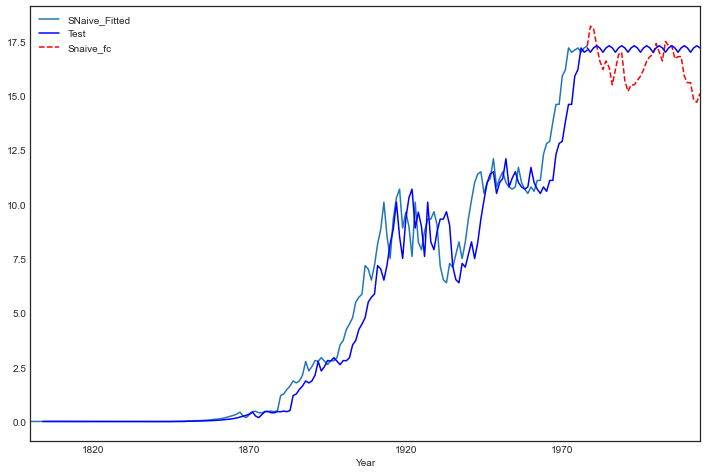

In [126]:
pd.plotting.register_matplotlib_converters()
train["CO2"].plot(figsize=(12,8))#, style="--", color="gray", legend=True, label="Train")
py_snaive_fit.plot(color="b", legend=True, label="SNaive_Fitted")
predictions["CO2"].plot(style="--",color="r", legend=True, label="Test")
predictions["py_snaive"].plot(color="b", legend=True, label="Snaive_fc");

In [127]:
#Training score
accuracy(train["CO2"].iloc[-len(py_snaive_fit.dropna()):], py_snaive_fit.dropna())

,%MAPE,RMSE
0,20.7,1.1


In [128]:
#Test score
accuracy(predictions["CO2"], predictions["py_snaive"])

,%MAPE,RMSE
0,5.8,1.2


** Mean of the residuals:  0.39

** Ljung Box Test, p-value: 0.0 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.01 (<0.05, Stationary)


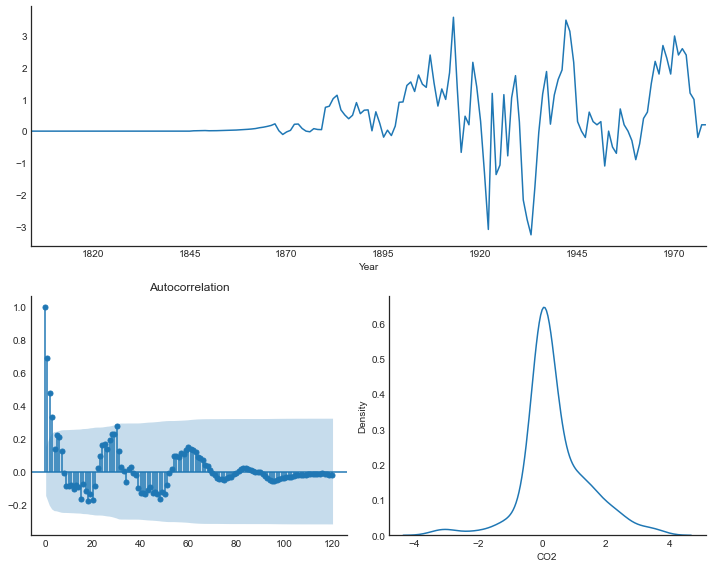

In [129]:
residcheck(py_snaive_resid.dropna(),120);

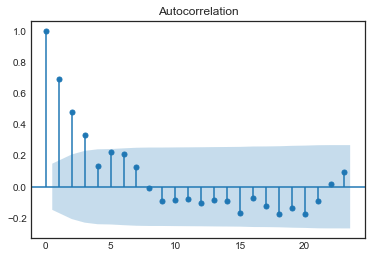

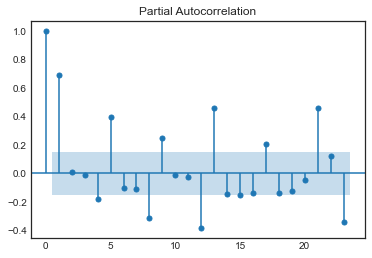

In [130]:
#PACF of Seasonal Snaive model residuals
plot_acf(py_snaive_resid);
plot_pacf(py_snaive_resid);

## Triple Exponential Smoothing (Holt-Winter's Method)


#### Grid Searching Triple Exponential Smoothing (Holt-Winter's Method) 

In [131]:
m=HWGrid(train["CO2"], test["CO2"], seasonal_periods=4)

In [132]:
m

,Trend,Seasonal,Damped,BoxCox,AICc Train,%MAPE_Train,RMSE_Train,%MAPE_Test,RMSE_Test,Resid_LJ,Resid_Norm,Resid_mean
10,add,mul,True,True,-184.500000,25.38%,0.600000,11.48%,2.100000,Correlated,Non-Normal,0.100000
11,add,mul,True,log,-158.100000,18.33%,0.600000,16.43%,2.900000,Correlated,Non-Normal,0.000000
0,add,add,False,False,-203.300000,839.51%,0.500000,17.75%,3.200000,Uncorrelated,Non-Normal,-0.000000
3,add,add,True,False,-199.600000,534.87%,0.500000,22.42%,4.000000,Uncorrelated,Non-Normal,0.000000
9,add,mul,True,False,-201.400000,8.69%,0.500000,23.37%,4.200000,Uncorrelated,Non-Normal,0.100000
21,mul,mul,True,False,-202.500000,9.34%,0.500000,23.66%,4.300000,Uncorrelated,Non-Normal,0.000000
5,add,add,True,log,-174.100000,7.58%,0.600000,24.57%,4.400000,Uncorrelated,Non-Normal,-0.000000
6,add,mul,False,False,-204.400000,8.75%,0.500000,25.92%,4.700000,Uncorrelated,Non-Normal,0.000000
4,add,add,True,True,-190.600000,8.33%,0.600000,32.77%,6.000000,Uncorrelated,Non-Normal,-0.000000
12,mul,add,False,False,-205.100000,594.53%,0.500000,35.03%,6.500000,Uncorrelated,Non-Normal,-0.000000


In [133]:
hw_model = ExponentialSmoothing(train["CO2"],
                          trend    ="add",
                          seasonal = "add", 
                          seasonal_periods=4, 
                          damped=False).fit(use_boxcox='log')

hw_fitted = hw_model.fittedvalues

hw_resid = hw_model.resid

#Adding the mean of the residuals to correct the bias.
py_hw = hw_model.forecast(len(test["CO2"])) + np.mean(hw_resid)

predictions["py_hw"] = py_hw

#Holt-Winter Parameters
hw_model.params_formatted

,name,param,optimized
smoothing_level,alpha,1.000000e+00,True
smoothing_trend,beta,6.647044e-02,True
smoothing_seasonal,gamma,1.806638e-12,True
initial_level,l.0,-7.755466e-01,True
initial_trend,b.0,-4.691840e-03,True
initial_seasons.0,s.0,-4.390601e+00,True
initial_seasons.1,s.1,-4.433460e+00,True
initial_seasons.2,s.2,-4.399903e+00,True
initial_seasons.3,s.3,-4.392790e+00,True


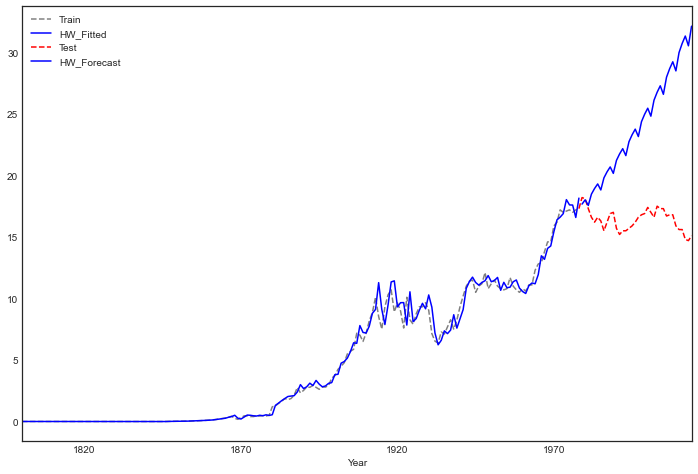

In [134]:
#Plotting

train["CO2"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
hw_fitted.plot(color="b", legend=True, label="HW_Fitted")
predictions["CO2"].plot(style="--",color="r", legend=True, label="Test")
predictions["py_hw"].plot(color="b", legend=True, label="HW_Forecast");

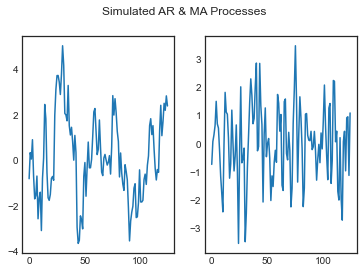

In [135]:
#Simulating AR process
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1,-0.9])
ma = np.array([1, 0.9])
AR = ArmaProcess(ar=ar, ma=None)
MA = ArmaProcess(ar=None, ma=ma)
simulated_AR= AR.generate_sample(125)
simulated_MA= MA.generate_sample(125)


fig, (ax1, ax2) = plt.subplots(1, 2)
# fig = plt.figure(figsize=(10,8))
fig.suptitle('Simulated AR & MA Processes')
ax1.plot(simulated_AR);
ax2.plot(simulated_MA);

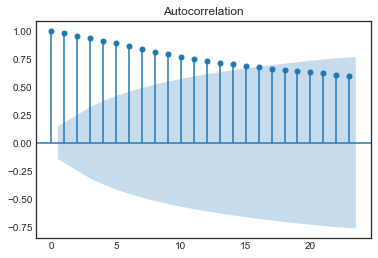

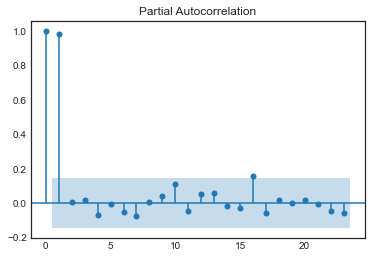

In [136]:
plot_acf(train["CO2"]);
plot_pacf(train["CO2"]);

In [137]:
(auto_arima(train["CO2"],
           seasonal=True,
           m=4,                          #seasonality_order 4
           d=1,                          #ACF plot showed we need at least 1 differencing
           information_criterion='aicc'). #You can choose AIC, BIC. AICc is corrected AIC
           summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  179
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -145.819
Date:                Fri, 23 Jul 2021   AIC                            295.638
Time:                        18:35:07   BIC                            302.002
Sample:                             0   HQIC                           298.219
                                - 179                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0972      0.041      2.358      0.018       0.016       0.178
sigma2         0.3014      0.018     16.895      0.000       0.266       0.336
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):               146.30
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              64.23   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

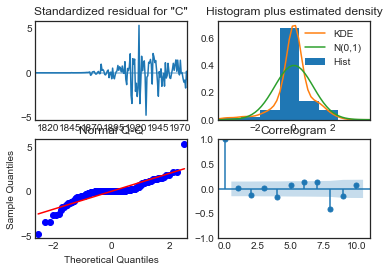

In [138]:
#Creating SARIMA model in Python using statsmodels

sarima_model=(SARIMAX(endog=train["CO2"], 
               order=(0,1,1),
               seasonal_order=(1,1,0,4),
               trend='c',
               enforce_invertibility=False))

sarima_fit=sarima_model.fit()

start = len(train)
end = len(train) +len(test) -1

sarima_fitted = sarima_fit.fittedvalues

sarima_resid = sarima_fit.resid

py_sarima = sarima_fit.predict(start, end, dynamic=False)

predictions["py_sarima"] = py_sarima

sarima_fit.plot_diagnostics();



In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy(predictions.CO2,py_sarima)

,%MAPE,RMSE
0,24.9,4.5


In [141]:
#Fitting model to log of train

(auto_arima(np.log(train["CO2"]),
           seasonal=True,
           m=4,                           #seasonality_order 4
           information_criterion='aicc'). #You can choose AIC, BIC. AICc is corrected AIC
           summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  179
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  43.125
Date:                Fri, 23 Jul 2021   AIC                            -80.249
Time:                        18:35:11   BIC                            -70.704
Sample:                             0   HQIC                           -76.378
                                - 179                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0450      0.025      1.765      0.078      -0.005       0.095
ma.L1          0.1355      0.098      1.381      0.167      -0.057       0.328
sigma2         0.0361      0.001     30.449      0.000       0.034       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21949.56
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             5.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
sarima_logmodel=(SARIMAX(np.log(train["CO2"]), 
               order=(0,0,0),
               seasonal_order=(1,1,0,4),
               trend='c',
               enforce_invertibility=False)).fit()

sarima_log = np.exp(sarima_logmodel.predict(start, end))

predictions["sarima_log"] = sarima_log

slog_fitted = np.exp(sarima_logmodel.fittedvalues)


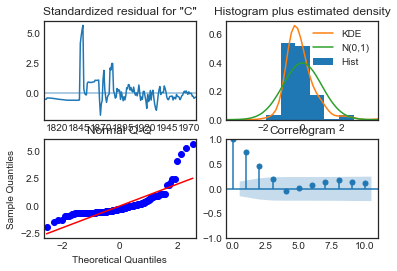

In [143]:
sarima_logmodel.plot_diagnostics();

In [144]:
accuracy(predictions.CO2,sarima_log )

,%MAPE,RMSE
0,186.8,37.5


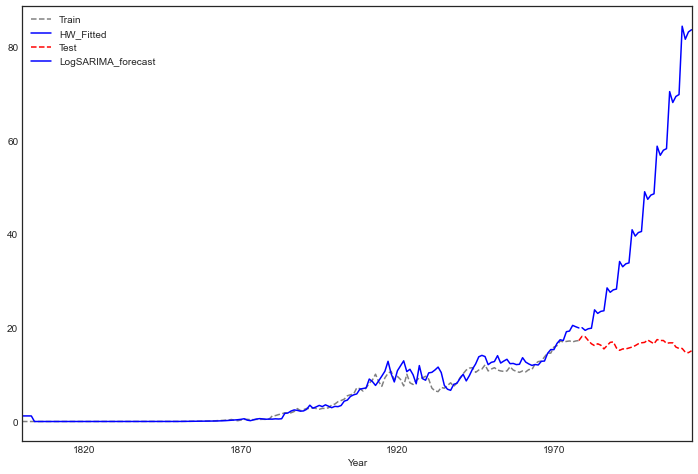

In [145]:
#Plotting

train["CO2"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
slog_fitted.plot(color="b", legend=True, label="HW_Fitted")
predictions["CO2"].plot(style="--",color="r", legend=True, label="Test")
predictions["sarima_log"].plot(color="b", legend=True, label="LogSARIMA_forecast");

In [146]:
carbondioxide_level["t"] = np.arange(1,216)

carbondioxide_level["t_sq"] = carbondioxide_level["t"]*carbondioxide_level["t"]

carbondioxide_level["log_CO2"] = np.log(carbondioxide_level["CO2"])
carbondioxide_level

,CO2,t,t_sq,log_CO2
Year,,,,
1800-01-01,0.00568,1,1,-5.170804
1801-01-01,0.00561,2,4,-5.183205
1802-01-01,0.00555,3,9,-5.193957
1803-01-01,0.00548,4,16,-5.206650
1804-01-01,0.00542,5,25,-5.217659
...,...,...,...,...
2010-01-01,15.60000,211,44521,2.747271
2011-01-01,15.60000,212,44944,2.747271
2012-01-01,14.80000,213,45369,2.694627


In [147]:

#splitting data
Train = carbondioxide_level.head(179)
Test = carbondioxide_level.tail(37)

### Linear Model :  

In [148]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('CO2~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_linear))**2))
rmse_linear

2.131661400392178

### Exponential Smoothing : 

In [149]:
Exp = smf.ols('log_CO2~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

413.2196394598704

### Quadratic Model : 

In [150]:
Quad = smf.ols('CO2~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_Quad))**2))
rmse_Quad

5.408078666472408

In [151]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,2.131661
2,rmse_Quad,5.408079
1,rmse_Exp,413.219639


In [152]:
predictions.round(0)

,CO2,py_snaive,py_hw,py_sarima,sarima_log
Year,,,,,
1978-01-01,17.0,17.0,NaN,NaN,NaN
1979-01-01,18.0,17.0,18.0,18.0,20.0
1980-01-01,18.0,17.0,18.0,18.0,19.0
1981-01-01,17.0,17.0,18.0,18.0,20.0
1982-01-01,17.0,17.0,18.0,18.0,20.0
1983-01-01,16.0,17.0,19.0,18.0,24.0
1984-01-01,17.0,17.0,19.0,18.0,23.0
1985-01-01,16.0,17.0,19.0,18.0,24.0
1986-01-01,16.0,17.0,20.0,19.0,24.0


In [153]:
forecasts

NameError: name 'forecasts' is not defined